**Women Cloth Reviews Prediction with Multi Nomial Naive Bayes**


The objective is to develop a predictive model using Multinomial Naive Bayes to analyze and classify women's clothing reviews. This model aims to accurately predict the sentiment of reviews, providing valuable insights for retailers to enhance customer satisfaction and tailor their product offerings.


**Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

**Import Dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv')

In [ ]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.shape

(23486, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


**Describe Data**

In [ ]:
df.describe()

,Clothing ID,Age,Rating,Recommended,Positive Feedback
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


**Data Cleaning**

**Missing Values**

In [ ]:
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [ ]:
df[df['Review']==""]=np.NaN

In [ ]:
df['Review'].fillna("No Review",inplace=True)

In [ ]:
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                  0
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [ ]:
df['Review']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review, Length: 23486, dtype: object


**Define Target Variable (y) and Feature Variables (X)**

In [ ]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

In [ ]:
X=df['Review']

In [ ]:
y = df['Rating']

In [ ]:
df['Rating'].value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,stratify=y, random_state=2529)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase = True,analyzer ='word',ngram_range=(2, 3),stop_words='english',max_features=5000)

# Fit the vectorizer to the training data
X_train = vectorizer.fit_transform(X_train)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Print the feature names
print(feature_names)




['10 12' '10 bought' '10 fit' ... 'yes runs' 'yoga pants' 'zipper little']


In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_test = vectorizer.transform(X_test)

In [ ]:
feature_names = vectorizer.get_feature_names_out()

# Print the feature names
print(feature_names)

['10 12' '10 bought' '10 fit' ... 'yes runs' 'yoga pants' 'zipper little']


In [ ]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Get Model Train**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)




MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(16441,)

In [ ]:
y_pred

array([5, 5, 5, ..., 5, 3, 5])

**Get Probability of Each Predicted Class**

In [ ]:
model.predict_proba(X_test)

array([[2.21518085e-04, 4.35111540e-03, 7.28906535e-02, 4.36723806e-01,
        4.85812907e-01],
       [5.29434153e-05, 1.77184211e-03, 4.74924491e-02, 8.13193660e-02,
        8.69363399e-01],
       [1.59258875e-05, 4.01625672e-05, 2.89748225e-04, 1.68318485e-02,
        9.82822315e-01],
       ...,
       [1.24752259e-01, 4.61579678e-02, 1.41745156e-02, 7.39038764e-02,
        7.41011381e-01],
       [6.05838556e-03, 2.46424252e-01, 5.88571180e-01, 9.68962297e-02,
        6.20499527e-02],
       [3.00236542e-02, 1.86080907e-01, 1.19260480e-01, 5.10321774e-02,
        6.13602782e-01]])

**Get Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.24      0.05      0.08       589
           2       0.23      0.12      0.16      1096
           3       0.32      0.28      0.30      2010
           4       0.32      0.24      0.27      3554
           5       0.69      0.85      0.76      9192

    accuracy                           0.57     16441
   macro avg       0.36      0.31      0.31     16441
weighted avg       0.52      0.57      0.53     16441



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[  29   91  140   83  246]
 [  24  131  370  191  380]
 [  30  183  563  493  741]
 [  20   82  408  841 2203]
 [  20   75  276 1039 7782]]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.5684569065142023


**Data Visualization**

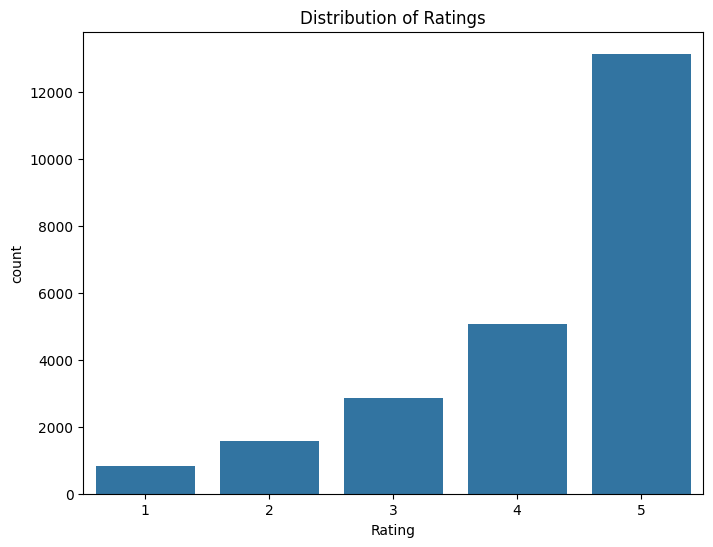

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.show()